In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Check for duplicates

data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
# checking for nulls and treating them.

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.isnull().sum()/len(data)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Feature Engineering

In [13]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 100],
                        labels=['20s', '30s', '40s', '50s', '60+'])


In [14]:
data['BMICategory'] = pd.cut(data['BMI'],
                           bins=[0, 18.5, 24.9, 29.9, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [15]:
data['HighGlucose'] = (data['Glucose'] > 140).astype(int)


In [16]:
data['Age_BMI_Interaction'] = data['Age'] * data['BMI']


In [17]:
data['InsulinLevel'] = pd.cut(data['Insulin'],
                            bins=[0, 100, 200, 1000],
                            labels=['Low', 'Normal', 'High'])


In [18]:
data = pd.get_dummies(data, columns=['AgeGroup', 'BMICategory', 'InsulinLevel'], drop_first=True)


In [19]:
scaler = StandardScaler()
scaled_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])


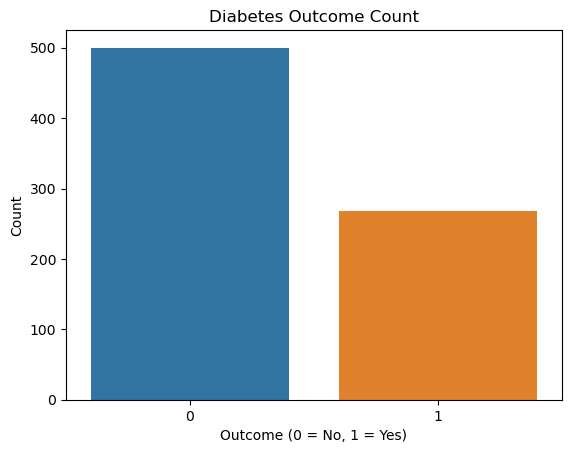

In [20]:
sns.countplot(data=data, x='Outcome')
plt.title('Diabetes Outcome Count')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


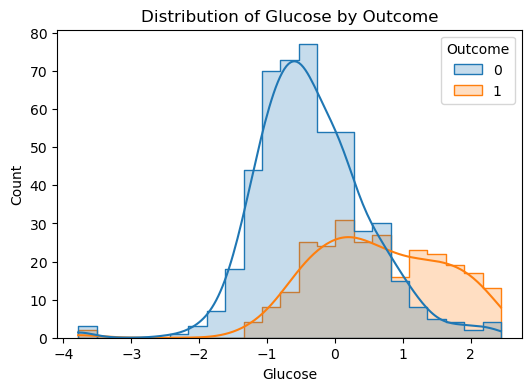

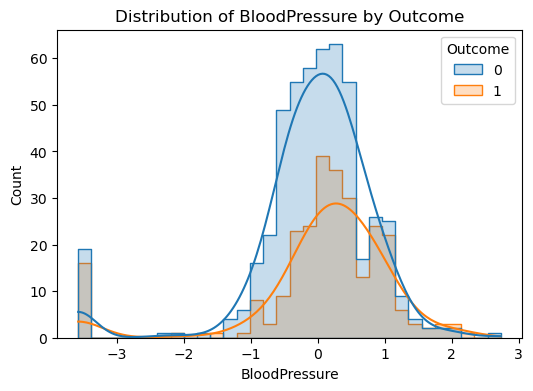

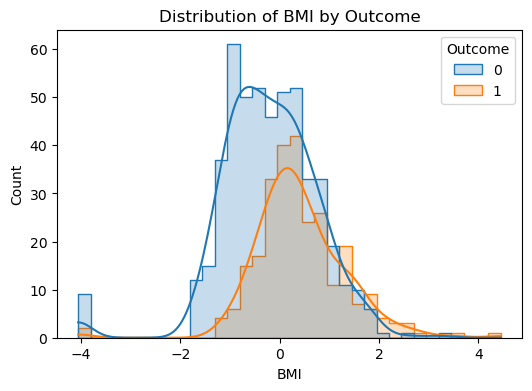

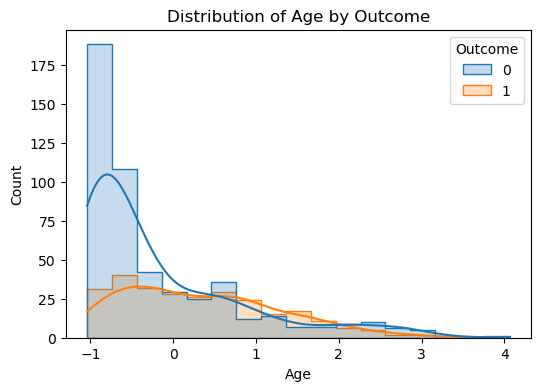

In [21]:
numeric_cols = ['Glucose', 'BloodPressure', 'BMI', 'Age']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, kde=True, hue='Outcome', element='step')
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

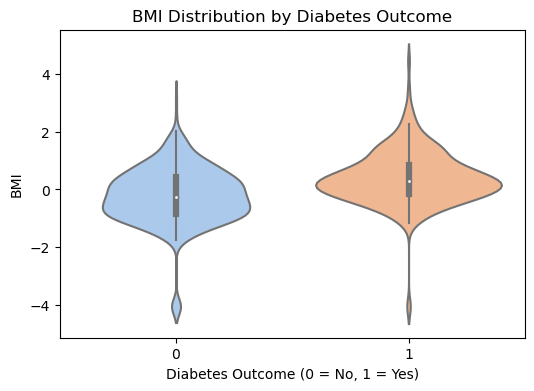

In [22]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='Outcome', y='BMI', palette='pastel')
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

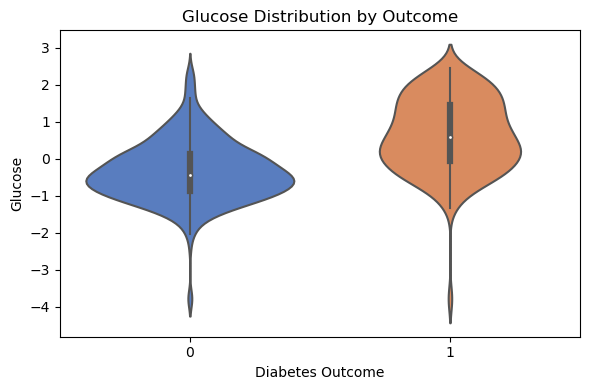

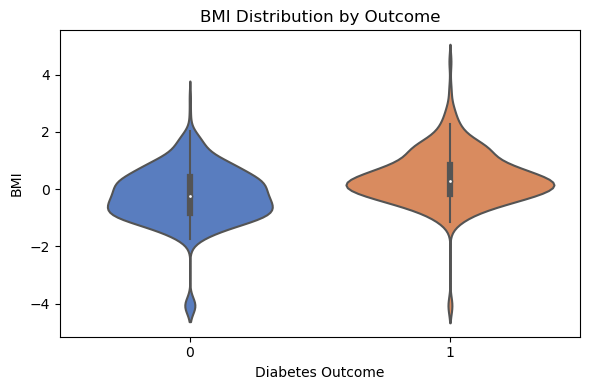

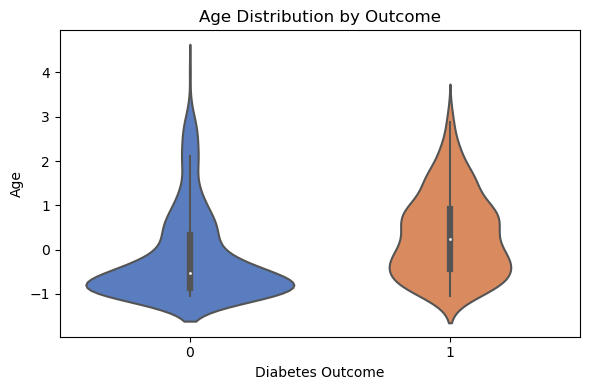

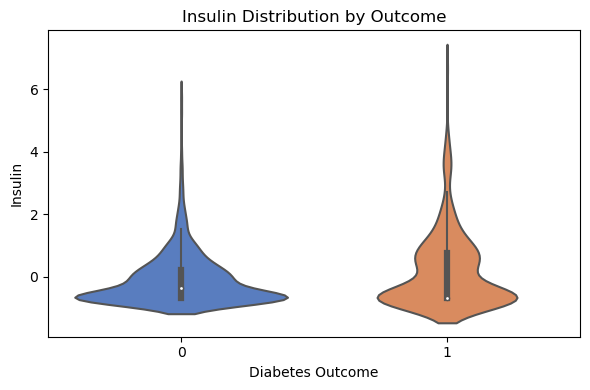

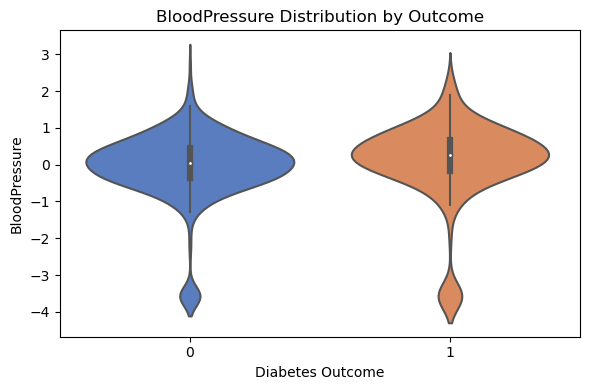

In [23]:
features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=data, x='Outcome', y=feature, palette='muted')
    plt.title(f'{feature} Distribution by Outcome')
    plt.xlabel('Diabetes Outcome')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


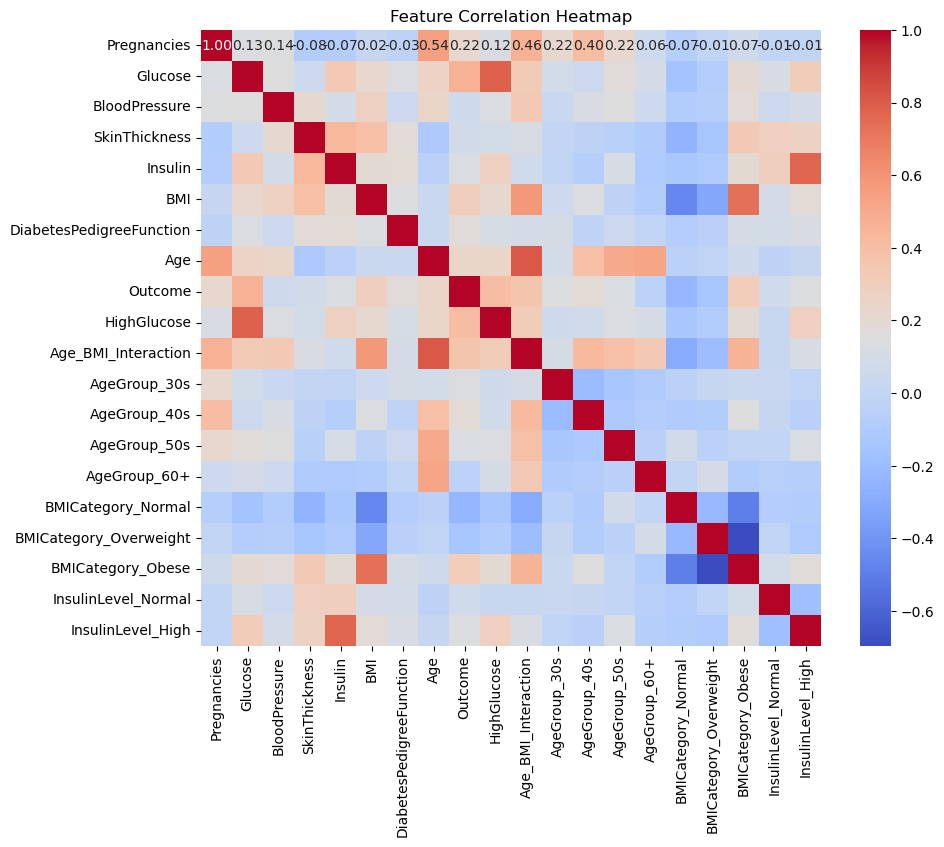

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


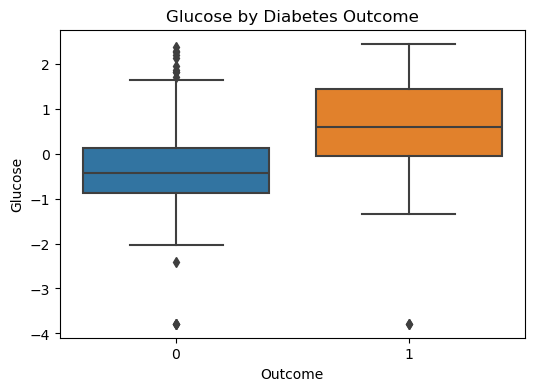

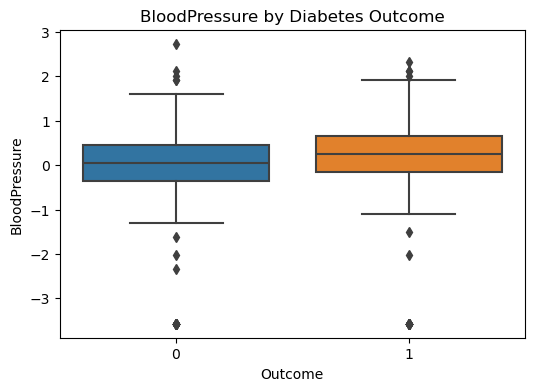

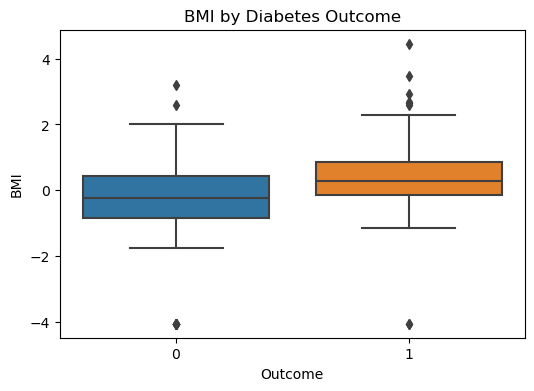

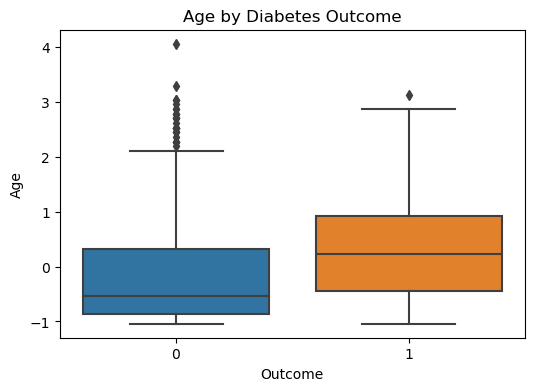

In [25]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='Outcome', y=col)
    plt.title(f'{col} by Diabetes Outcome')
    plt.show()


In [26]:
# Convert Outcome to string
data['Outcome'] = data['Outcome'].astype(str)


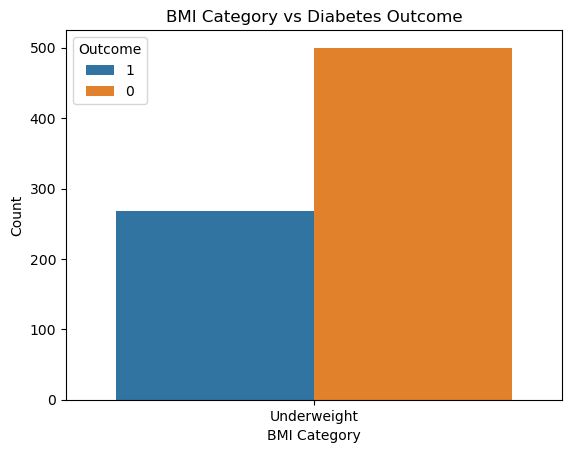

In [27]:
# Create BMI Category column
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['BMICategory'] = data['BMI'].apply(bmi_category)

#  plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='BMICategory', hue='Outcome')
plt.title('BMI Category vs Diabetes Outcome')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


In [28]:
features = ['Glucose', 'BMI', 'Age', 'Insulin']

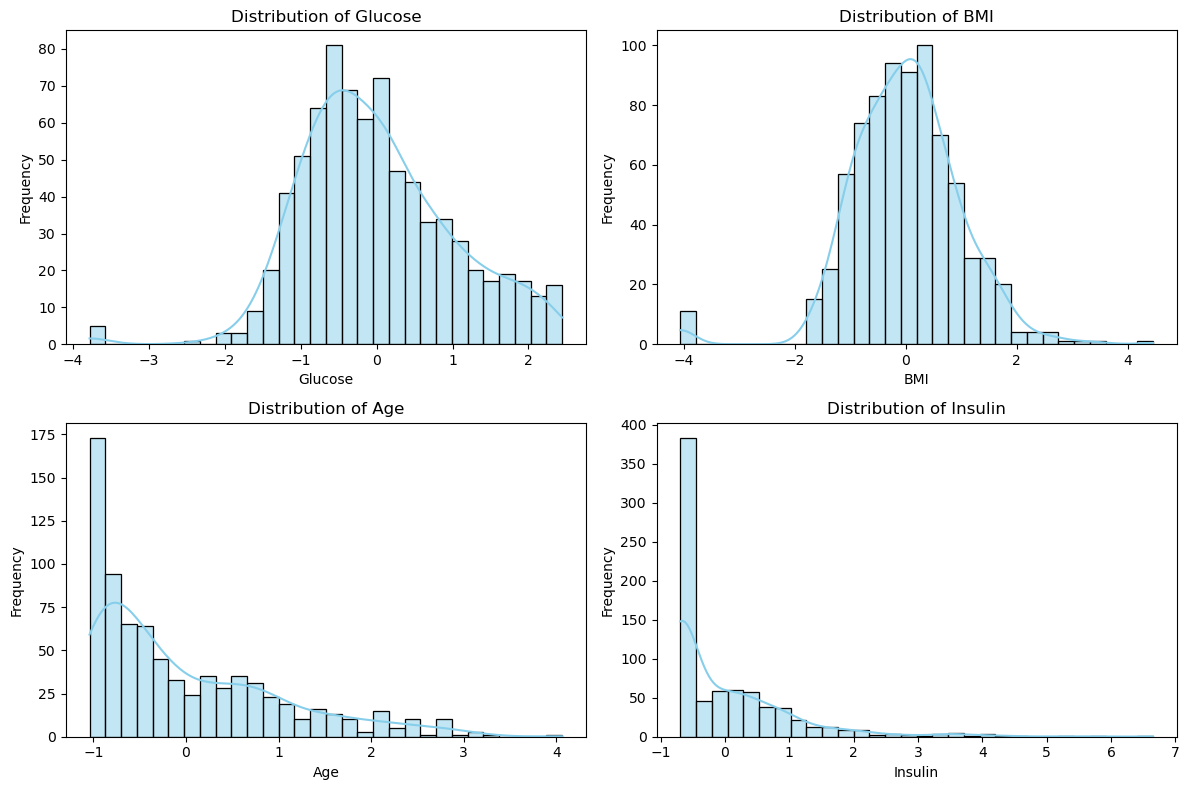

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
column = 'Glucose'

In [31]:
col_data = data[column].dropna()

In [32]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(col_data, 25, interpolation='midpoint')
Q3 = np.percentile(col_data, 75, interpolation='midpoint')
IQR = Q3 - Q1


In [33]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [34]:
# Identify outliers
outliers = data[(data[column] >= (Q3 + 1.5 * IQR)) | (data[column] <= (Q1 - 1.5 * IQR))]

In [35]:
display(outliers.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HighGlucose,...,AgeGroup_30s,AgeGroup_40s,AgeGroup_50s,AgeGroup_60+,BMICategory_Normal,BMICategory_Overweight,BMICategory_Obese,InsulinLevel_Normal,InsulinLevel_High,BMICategory
75,1,-3.783654,-1.091105,-0.033651,-0.692891,-0.925569,0.140,-0.956462,0,0,...,False,False,False,False,True,False,False,False,False,Underweight
182,1,-3.783654,0.253036,-0.033651,-0.493184,-0.544811,0.299,-1.041549,0,0,...,False,False,False,False,False,True,False,False,False,Underweight
342,1,-3.783654,-0.057150,0.907270,-0.692891,0.000942,0.389,-0.956462,0,0,...,False,False,False,False,False,False,True,False,False,Underweight
349,5,-3.783654,0.563223,0.719086,-0.692891,1.143215,0.346,0.319855,1,0,...,True,False,False,False,False,False,True,False,False,Underweight
502,6,-3.783654,-0.057150,1.283638,-0.692891,0.889377,0.727,0.660206,1,0,...,False,True,False,False,False,False,True,False,False,Underweight


# Logistic Regression

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [38]:
# OPTIONAL: Create BMI categories (if you haven't already)
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

data["BMICategory"] = data["BMI"].apply(bmi_category)


In [39]:
# One-hot encode BMICategory
data_encoded = pd.get_dummies(data, columns=["BMICategory"], drop_first=True)

# Split features and target
X = data_encoded.drop("Outcome", axis=1)
y = data_encoded["Outcome"]

In [40]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
Confusion Matrix:
 [[83 16]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# KKN

In [44]:
# imporrt libreries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [45]:
# IMPORTANT: Scale features for KNN (KNN is distance-based, so scaling matters!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Train-test split on scaled data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [47]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
# Train the model
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [49]:
# Predict
y_pred_knn = knn.predict(X_test_knn)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_knn, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_knn, y_pred_knn))

KNN Accuracy: 0.7207792207792207
Confusion Matrix:
 [[78 21]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



# Tune The K Parameter

In [51]:
from sklearn.metrics import accuracy_score

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    print(f"k={k}, Accuracy={accuracy_score(y_test_knn, y_pred):.4f}")


k=1, Accuracy=0.6753
k=2, Accuracy=0.7078
k=3, Accuracy=0.7143
k=4, Accuracy=0.7273
k=5, Accuracy=0.7208
k=6, Accuracy=0.7403
k=7, Accuracy=0.7338
k=8, Accuracy=0.7208
k=9, Accuracy=0.7338
k=10, Accuracy=0.7273
k=11, Accuracy=0.7273
k=12, Accuracy=0.7403
k=13, Accuracy=0.7338
k=14, Accuracy=0.7143
k=15, Accuracy=0.7208
k=16, Accuracy=0.7208
k=17, Accuracy=0.7208
k=18, Accuracy=0.7143
k=19, Accuracy=0.7143
k=20, Accuracy=0.7078


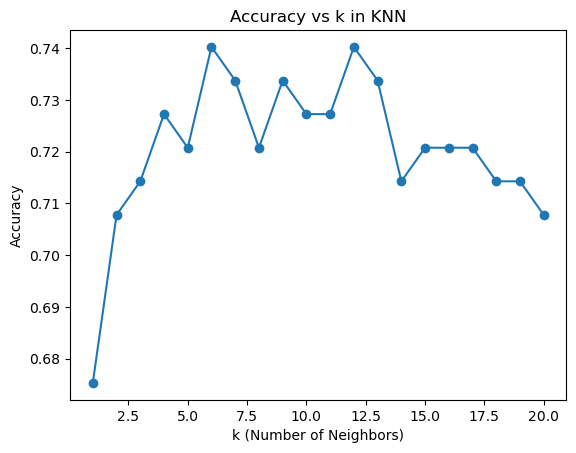

In [52]:
import matplotlib.pyplot as plt

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    accuracies.append(accuracy_score(y_test_knn, y_pred))

plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in KNN')
plt.show()


# Use Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_scaled, y, cv=5)  # 5-fold CV
print("Average CV Accuracy:", scores.mean())


Average CV Accuracy: 0.7553178847296493


# Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# Train-test split (already scaled)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
# Initialize and tune Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    random_state=42
)


In [59]:
# Train the model
dt_model.fit(X_train_dt, y_train_dt)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

In [60]:
# Predict
y_pred_dt = dt_model.predict(X_test_dt)

# Evaluate
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test_dt, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_dt, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_dt, y_pred_dt))


Tuned Decision Tree Accuracy: 0.7142857142857143
Confusion Matrix:
 [[73 26]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



# Decison Tree using Entropy and Gini

In [67]:
data.dtypes, data.nunique(), data.columns[data.dtypes == 'object']

(Pregnancies                   int64
 Glucose                     float64
 BloodPressure               float64
 SkinThickness               float64
 Insulin                     float64
 BMI                         float64
 DiabetesPedigreeFunction    float64
 Age                         float64
 Outcome                      object
 HighGlucose                   int32
 Age_BMI_Interaction         float64
 AgeGroup_30s                   bool
 AgeGroup_40s                   bool
 AgeGroup_50s                   bool
 AgeGroup_60+                   bool
 BMICategory_Normal             bool
 BMICategory_Overweight         bool
 BMICategory_Obese              bool
 InsulinLevel_Normal            bool
 InsulinLevel_High              bool
 BMICategory                  object
 dtype: object,
 Pregnancies                  17
 Glucose                     136
 BloodPressure                47
 SkinThickness                51
 Insulin                     186
 BMI                         248
 Diabetes

In [71]:
# Convert 'Outcome' to numeric
data['Outcome'] = pd.to_numeric(data['Outcome'], errors='coerce')

# Drop the constant or irrelevant column
data = data.drop(columns=['BMICategory'])

# Drop any rows with missing values
data = data.dropna()

In [75]:
# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [77]:
# Initialize and train decision tree classifiers
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

clf_entropy.fit(X_train, y_train)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [79]:
# Make predictions
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_gini = clf_gini.predict(X_test)

In [81]:
# Evaluate performance
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

report_entropy = classification_report(y_test, y_pred_entropy, output_dict=True)
report_gini = classification_report(y_test, y_pred_gini, output_dict=True)

accuracy_entropy, accuracy_gini, report_entropy, report_gini

(0.696969696969697,
 0.6926406926406926,
 {'0': {'precision': 0.8,
   'recall': 0.7152317880794702,
   'f1-score': 0.7552447552447553,
   'support': 151},
  '1': {'precision': 0.5520833333333334,
   'recall': 0.6625,
   'f1-score': 0.6022727272727273,
   'support': 80},
  'accuracy': 0.696969696969697,
  'macro avg': {'precision': 0.6760416666666667,
   'recall': 0.6888658940397351,
   'f1-score': 0.6787587412587412,
   'support': 231},
  'weighted avg': {'precision': 0.7141414141414143,
   'recall': 0.696969696969697,
   'f1-score': 0.7022674295401569,
   'support': 231}},
 {'0': {'precision': 0.7702702702702703,
   'recall': 0.7549668874172185,
   'f1-score': 0.7625418060200668,
   'support': 151},
  '1': {'precision': 0.5542168674698795,
   'recall': 0.575,
   'f1-score': 0.5644171779141104,
   'support': 80},
  'accuracy': 0.6926406926406926,
  'macro avg': {'precision': 0.662243568870075,
   'recall': 0.6649834437086093,
   'f1-score': 0.6634794919670886,
   'support': 231},
  'we

In [87]:
# Initialize and train the Decision Tree using Entropy with constraints
clf_entropy = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5,               
    min_samples_split=20,      
    random_state=42
)
clf_entropy.fit(X_train, y_train)

# Predict
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate
print("Entropy (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Entropy (Tuned) - Report:\n", classification_report(y_test, y_pred_entropy))

Entropy (Tuned) - Accuracy: 0.7186147186147186
Entropy (Tuned) - Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



In [83]:
# Initialize and train the Decision Tree using Gini with constraints
clf_gini = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=5,               
    min_samples_split=20,      
    random_state=42
)
clf_gini.fit(X_train, y_train)

# Predict
y_pred_gini = clf_gini.predict(X_test)

# Evaluate
print("Gini (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Gini (Tuned) - Report:\n", classification_report(y_test, y_pred_gini))

Gini (Tuned) - Accuracy: 0.7316017316017316
Gini (Tuned) - Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



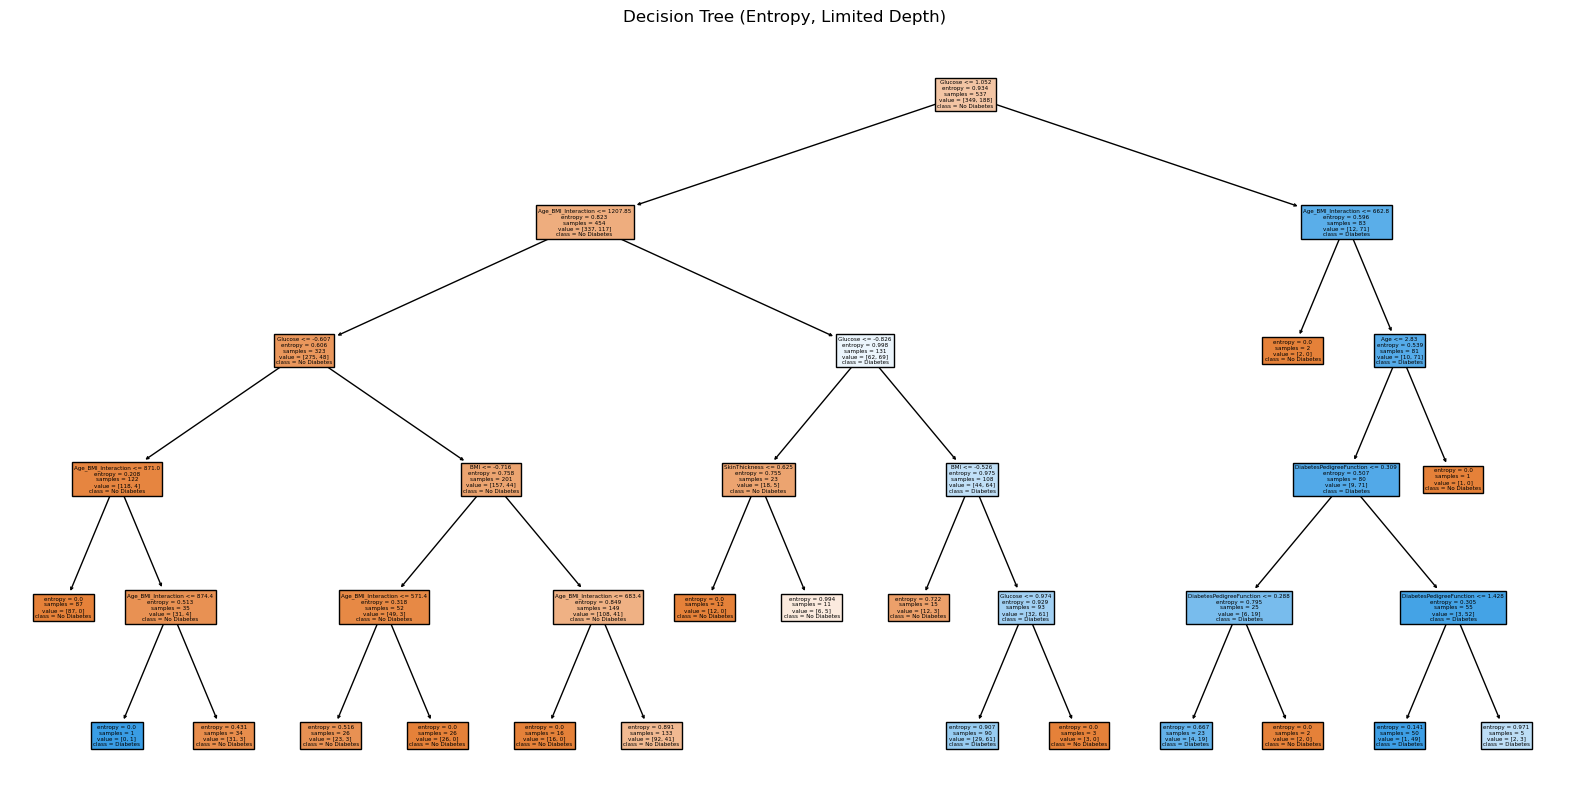

In [89]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf_entropy,
    filled=True,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes']  # adjust labels as needed
)
plt.title("Decision Tree (Entropy, Limited Depth)")
plt.show()

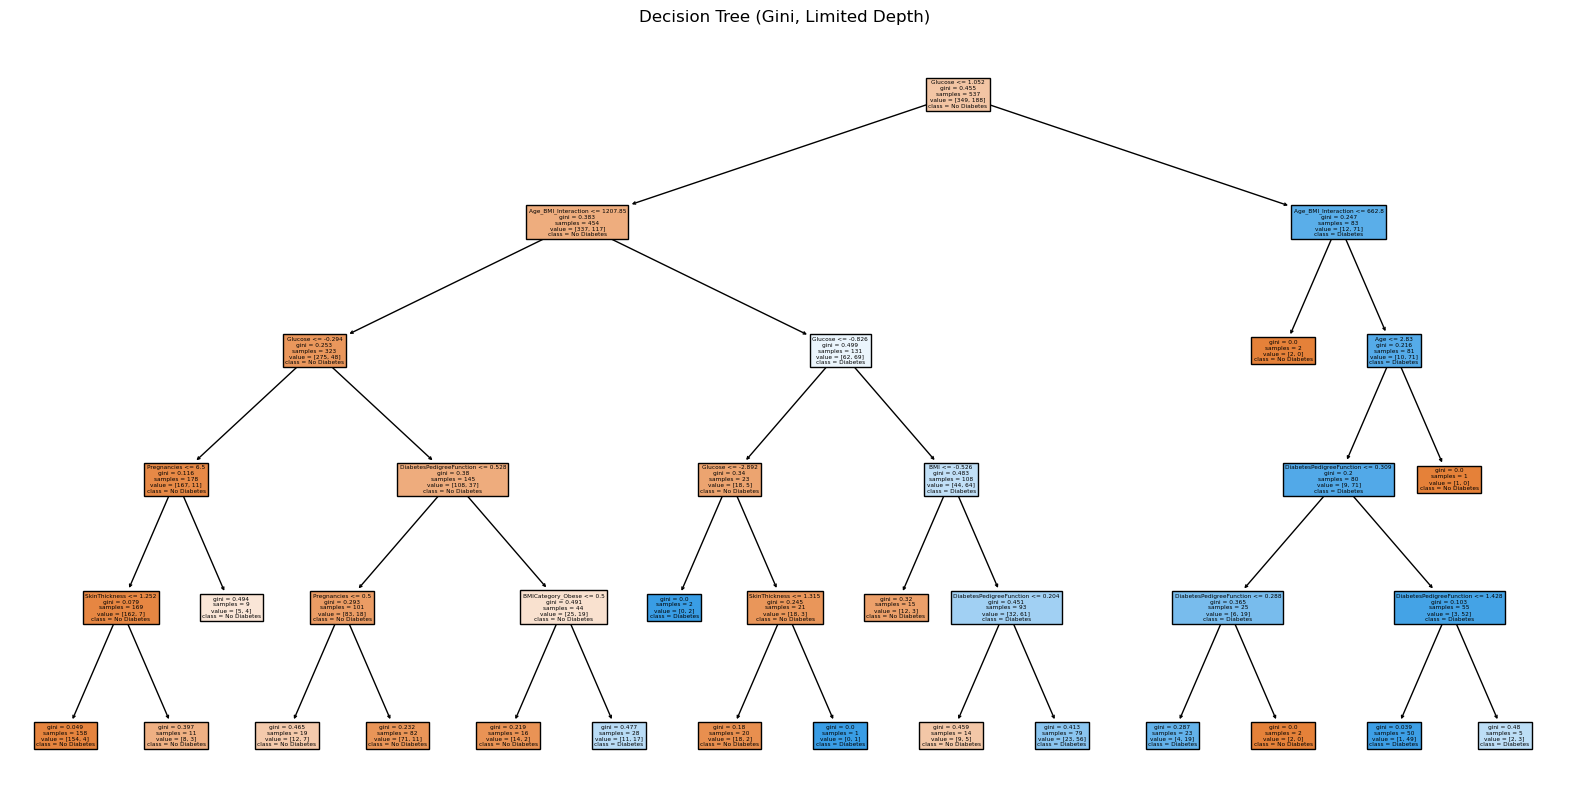

In [91]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf_gini,
    filled=True,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes']
)
plt.title("Decision Tree (Gini, Limited Depth)")
plt.show()

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:
# Predict on the test set
y_pred = rf.predict(X_test)


In [105]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231


Confusion Matrix:
 [[123  28]
 [ 30  50]]


In [109]:
# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

# Sort values for better visualization
feature_importance = feature_importance.sort_values(ascending=True)


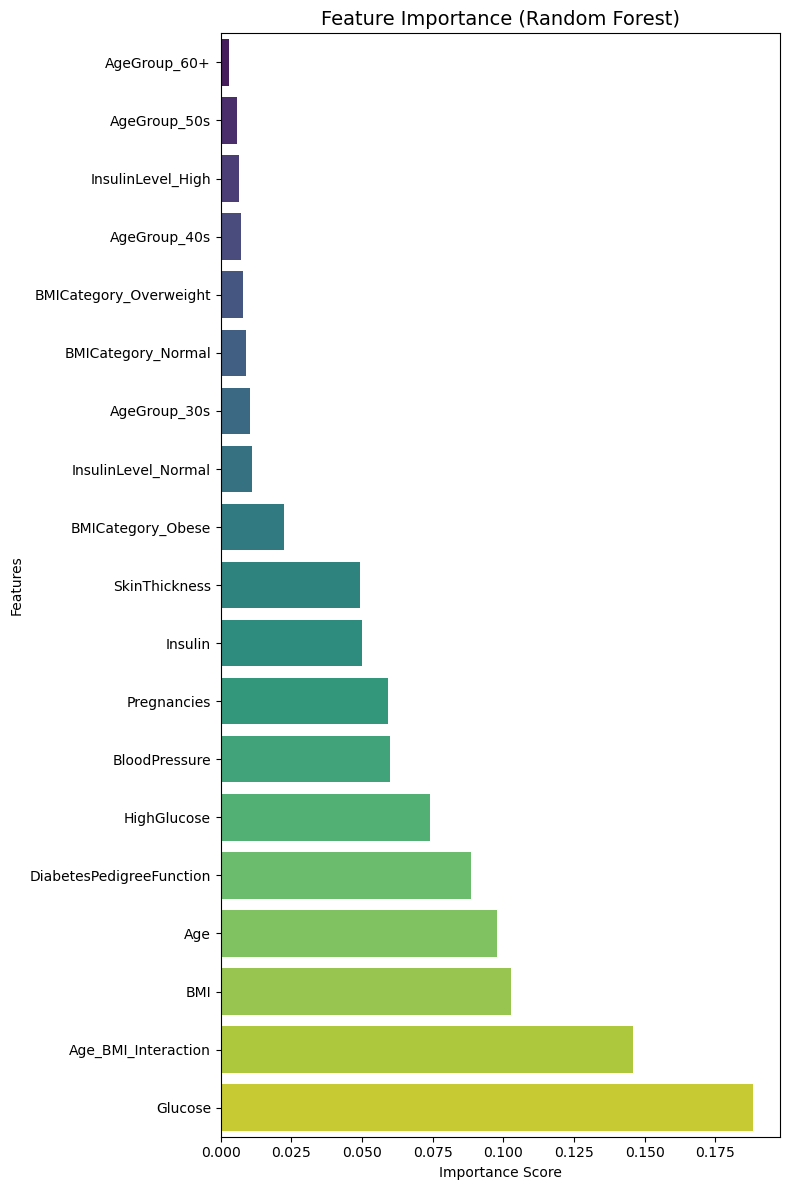

In [111]:
# Plot
plt.figure(figsize=(8, 12))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# GridSearchCV

In [160]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


In [222]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [224]:
# Initialize model
rf = RandomForestClassifier(random_state=42)


In [226]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


In [228]:
# Fit to training data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy', verbose=1)

In [229]:
# Best params and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.7728


In [230]:
# Use the best model from grid search to predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231


Confusion Matrix:
 [[123  28]
 [ 28  52]]


In [234]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [236]:
rf.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

In [238]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',  # better metric for imbalanced data
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [240]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [242]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
    ],
    final_estimator=LogisticRegression()
)

stack_model.fit(X_train_balanced, y_train_balanced)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [246]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


In [252]:
y_pred = model.predict(X_test)

# Convert predicted labels to integers if they're strings
y_pred = y_pred.astype(int)

# Now calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [256]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Convert to integers if they're strings
y_pred = [int(label) for label in y_pred]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       151
           1       0.70      0.65      0.68        80

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231


Confusion Matrix:
 [[129  22]
 [ 28  52]]
